<a href="https://colab.research.google.com/github/mofanchang/AHEAD-interview-question/blob/main/Bonus_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.Please explain the fundamental principles of flow cytometry and walk through the step-by-step process of how it works? Additionally, highlight some common applications of flow cytometry in scientific research and clinical settings.

**1.1**
**Step 1: Sample Preparation**

1. Collect cells or tissue, create a single-cell suspension.
2. Transfer the suspension to a 96-well plate, test tubes, or round bottom tubes based on cell count and volume.
3. Wash cells, ensure cell count and viability.
4. Centrifuge and resuspend cells in cold suspension buffer for a concentration of 0.5–1 x 106 cells/mL.

**Step 2: Live/Dead Staining**

1. Use a viability dye to differentiate live and dead cells.
2. Wash stained cells, prevent photobleaching.

**Step 3: Fixation and Permeabilization (For Intracellular Staining)**

1. Fix cells using appropriate fixative.
2. Wash fixed cells, then perform permeabilization.
3. Permeabilized cells are ready for staining.

**Step 4: Blocking**

1. Use blocking agents to prevent non-specific antibody binding.
2. Wash cells, prepare for antibody incubation.

**Step 5: Antibody Incubation**

1. Stain cells with labeled primary or secondary antibodies.
2. Wash stained cells, prepare for flow cytometer analysis.

**Step 6: Detection and Data Analysis**

1. Analyze stained cells in the flow cytometer.
2. Follow manufacturer's guide for detection and data analysis.

These simplified steps outline the main process of flow cytometry from sample preparation to antibody incubation to data analysis. The fluidics system maintains a constant flow of single-cell suspension through the cytometer. Laser illumination interacts with cells, causing scatter and fluorescence emissions.

Scatter Detection:
- FSC (Forward Scatter): Measures light intensity scattered in the forward direction, indicating size.
- SSC (Side Scatter): Measures light scattered at an angle, indicating complexity or granularity.

Fluorescence Detection:
- Fluorescently labeled cells emit specific wavelengths when illuminated by lasers. Detectors capture emitted fluorescence, enabling analysis of specific molecules within cells.

Data Analysis:
- Signals from detectors are collected and analyzed. Data is presented as scatter plots and histograms, allowing researchers to differentiate cell populations based on size, complexity, and fluorescence.

**1.2**
Applications of flow cytometry in scientific research and clinical settings

**Scientiftic research**

1.Immunophenotyping

2.Cell Sorting

3.Cell Cycle Analysis

4.Apoptosis

5.Cell Proliferation Assays

6.Intracellular Calcium Flux

**Clinical setting**

1.Analysis of leukaemias and lymphomas

2.Detection of minimal residual disease

3.Stem cell enumeration

4.solid organ transplantation

5.Postoperative monitoring

6.Detection of autoantibodies

7.HIV infection.

8.Foeto-maternal haemorrhage

9.Immunodeficiency diseases

10.Paroxysmal nocturnal haemoglobinuria

11.Reticulocyte analysis

12.Some other applications in blood transfusion



###2.Below are plots of selected cell surface biomarkers of blood cell samples. Researchers are interested in picking out cells marked in yellow (accupying a high-density chunk at the bottom-right) for further analysis. How would you suggest a method to automatically identify these cells?

In [1]:
pip install FlowCal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.0 MB/s eta 0:00:00
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84523 sha256=690cdaa63df63c95760f101bb321b710c49827a0f1005349ebf502292fe436ae
  Stored in directory: /root/.cache/pip/wheels/b1/9c/f3/4c59694424e6a6d70b11b66f076d8a2359b57dfdb9b723ed3f
Successfully built FlowCal
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [19]:
import os
import FlowCal
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def concat_FCSdata_FeatureName(filename):
    # Load the FCS file
    fcs_file = FlowCal.io.FCSData(filename)

    # View and store feature
    tuple_feature = fcs_file.channels
    list_feature = list(tuple_feature)

    # Convert the FCS data to DataFrame
    df = pd.DataFrame(fcs_file)
    df.columns = list_feature

    return df

# Read label information from Excel file
EU_label = pd.read_excel('/content/drive/MyDrive/EU_label.xlsx')
label = EU_label['label']
label_map = {
    'Sick': 1,
    'Healthy': 0,
}

# Specify the main directory containing subdirectories with FCS files
main_directory = "/content/drive/MyDrive/raw_fcs"

# Initialize an empty DataFrame to store concatenated data
final_df = pd.DataFrame()

# Recursively traverse through the main directory
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)

            # Extract Patient ID from the filename
            Patient = os.path.basename(os.path.dirname(file_path))
            PatientID = StringIO(Patient)
            df_PatientID = pd.read_csv(PatientID)

            # Concatenate feature names and FCS data
            df = concat_FCSdata_FeatureName(file_path)

            # Find matching label for the current patient
            for index, row in EU_label.iterrows():
                if row['file_flow_id'] == Patient:
                    label_value = row['label']
                    label_int = label_map[label_value]
                    df['Patient_ID'] = Patient
                    df['COVID19'] = label_value
                    df['Label'] = label_int

                    # Concatenate the current patient data to the final DataFrame
                    final_df = pd.concat([final_df, df], ignore_index=True)


In [11]:
pip install flowgrid

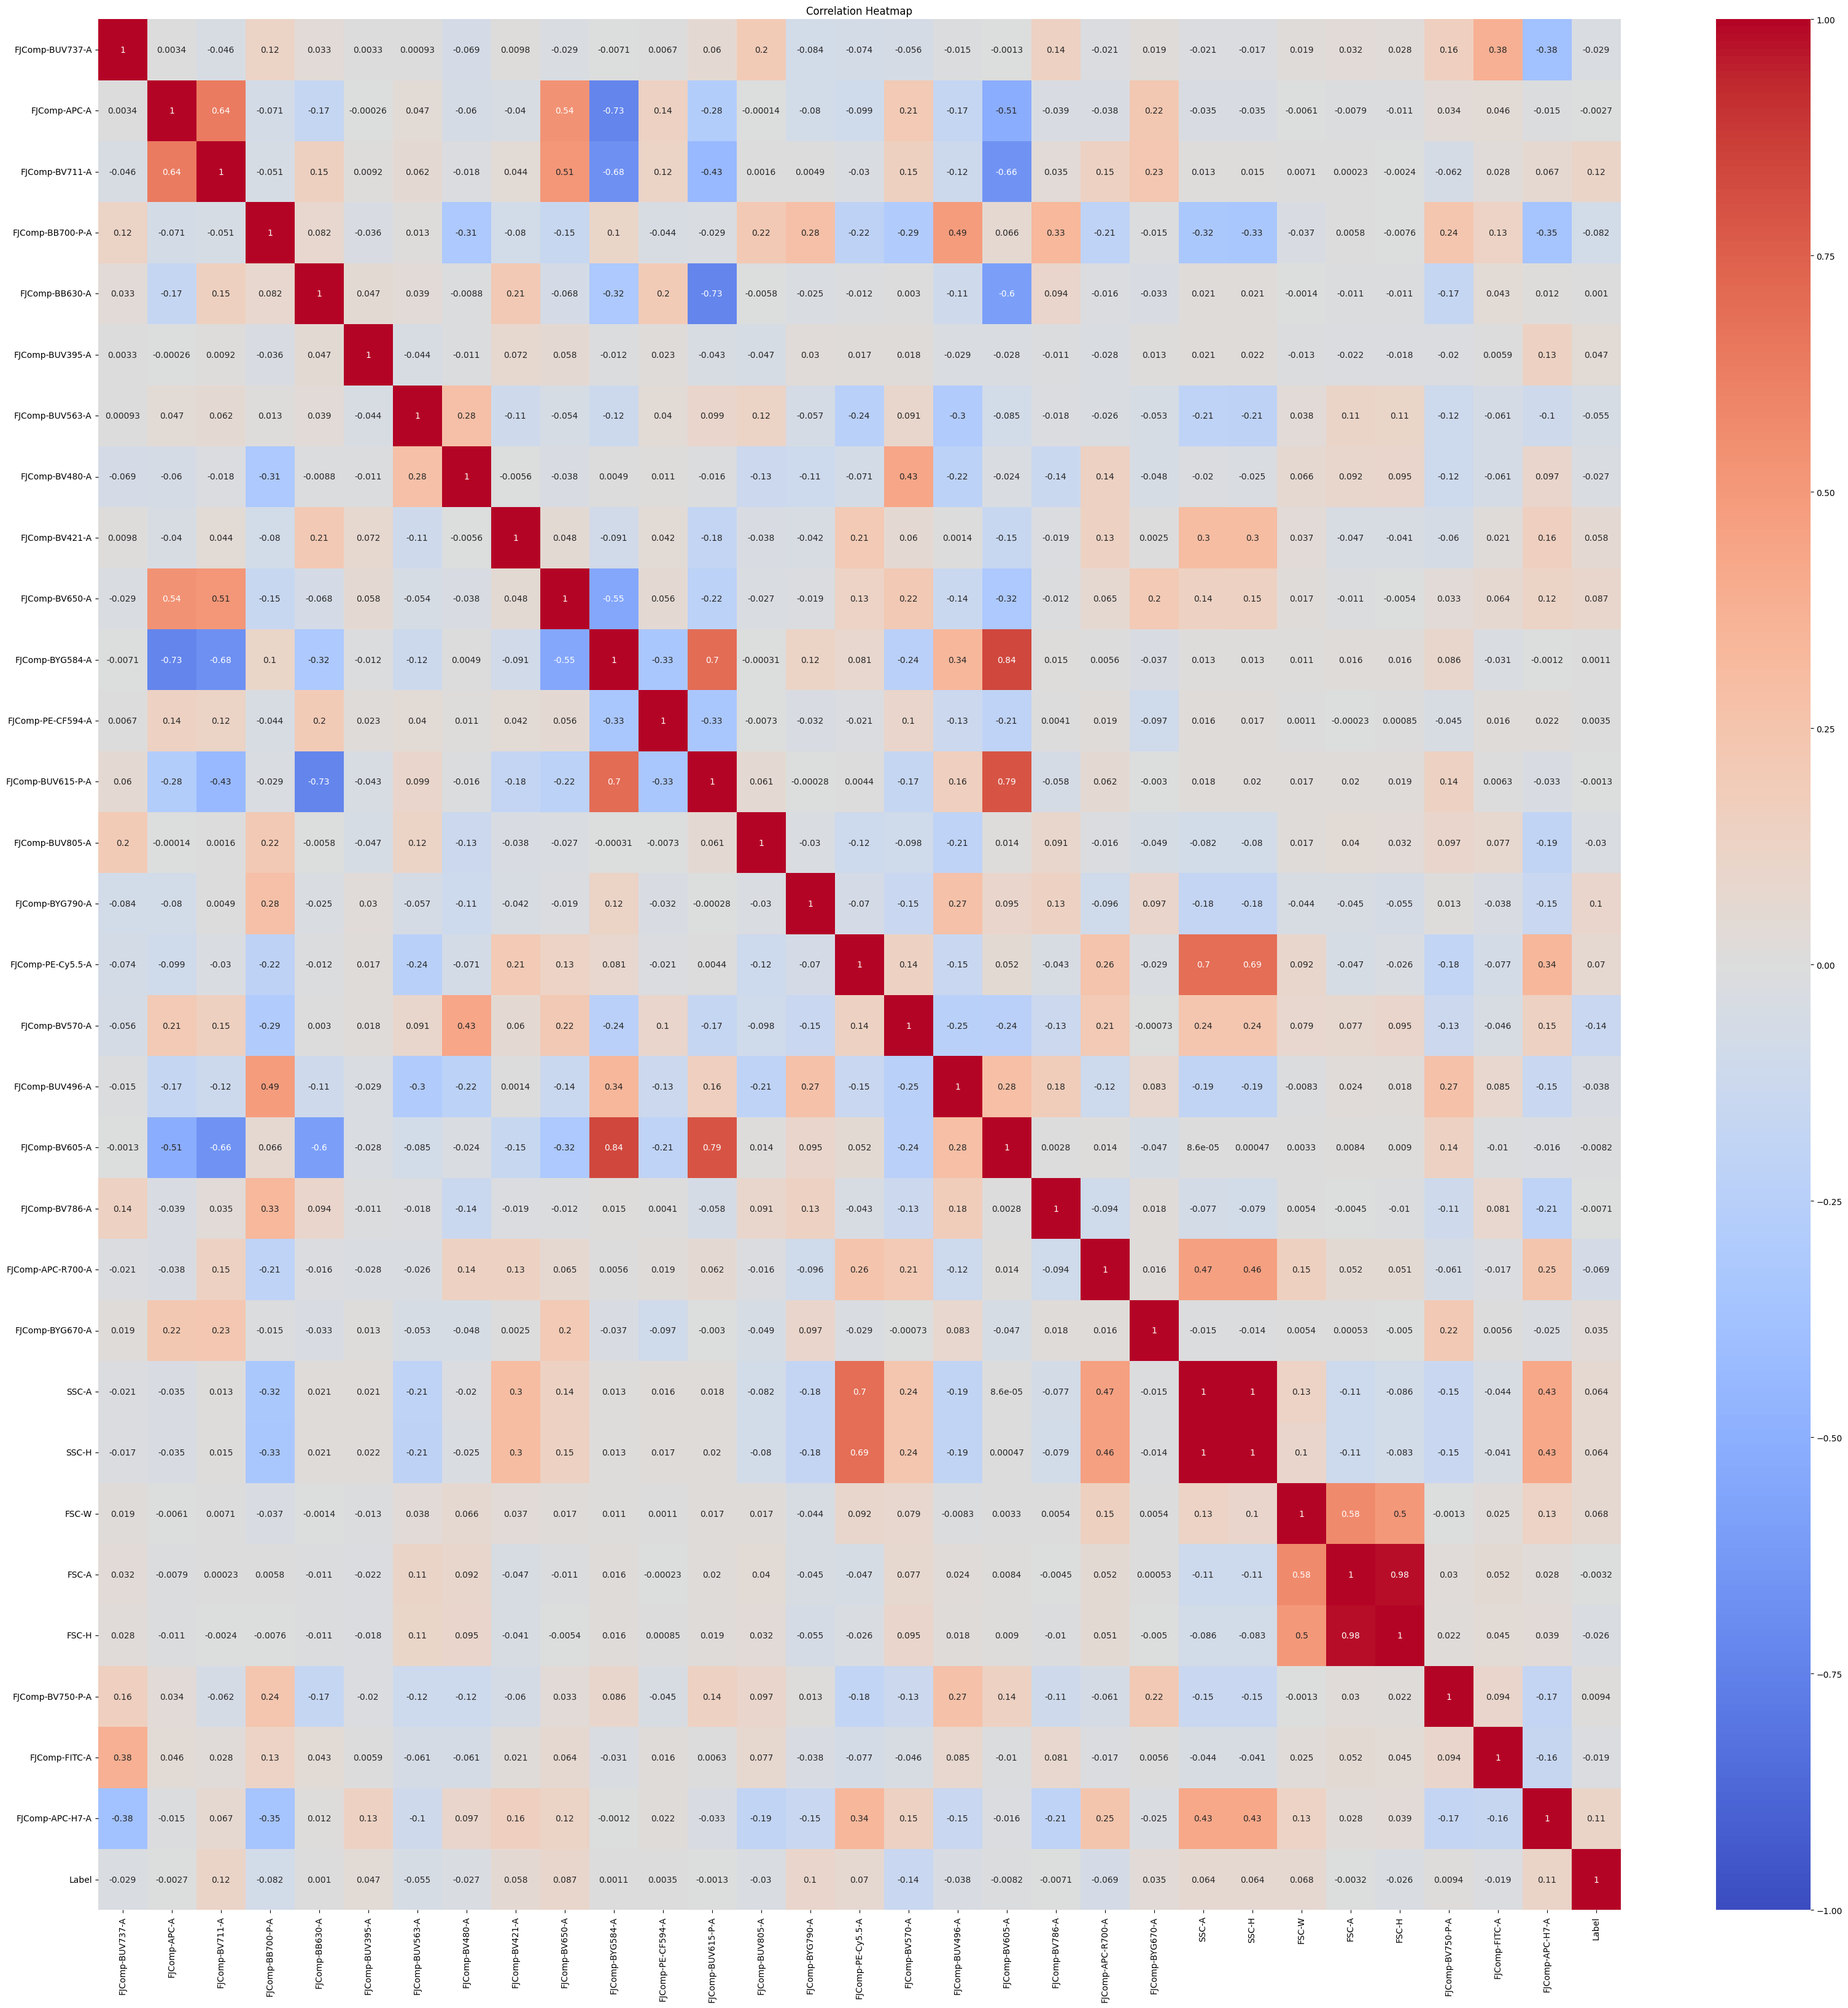

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据或者使用您的DataFrame
# final_df = pd.read_csv("your_data.csv")

# 选择要计算相关性的特征列
selected_features = ['FJComp-BUV737-A','FJComp-APC-A','FJComp-BV711-A','FJComp-BB700-P-A','FJComp-BB630-A','FJComp-BUV395-A','FJComp-BUV563-A','FJComp-BV480-A',
'FJComp-BV421-A','FJComp-BV650-A','FJComp-BYG584-A','FJComp-PE-CF594-A','FJComp-BUV615-P-A','FJComp-BUV805-A','FJComp-BYG790-A',
'FJComp-PE-Cy5.5-A','FJComp-BV570-A','FJComp-BUV496-A','FJComp-BV605-A','FJComp-BV786-A','FJComp-APC-R700-A','FJComp-BYG670-A',
'SSC-A','SSC-H','FSC-W','FSC-A','FSC-H','FJComp-BV750-P-A','FJComp-FITC-A','FJComp-APC-H7-A','Label']

# 计算相关性矩阵
correlation_matrix = final_df[selected_features].corr()

# 绘制热力图
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


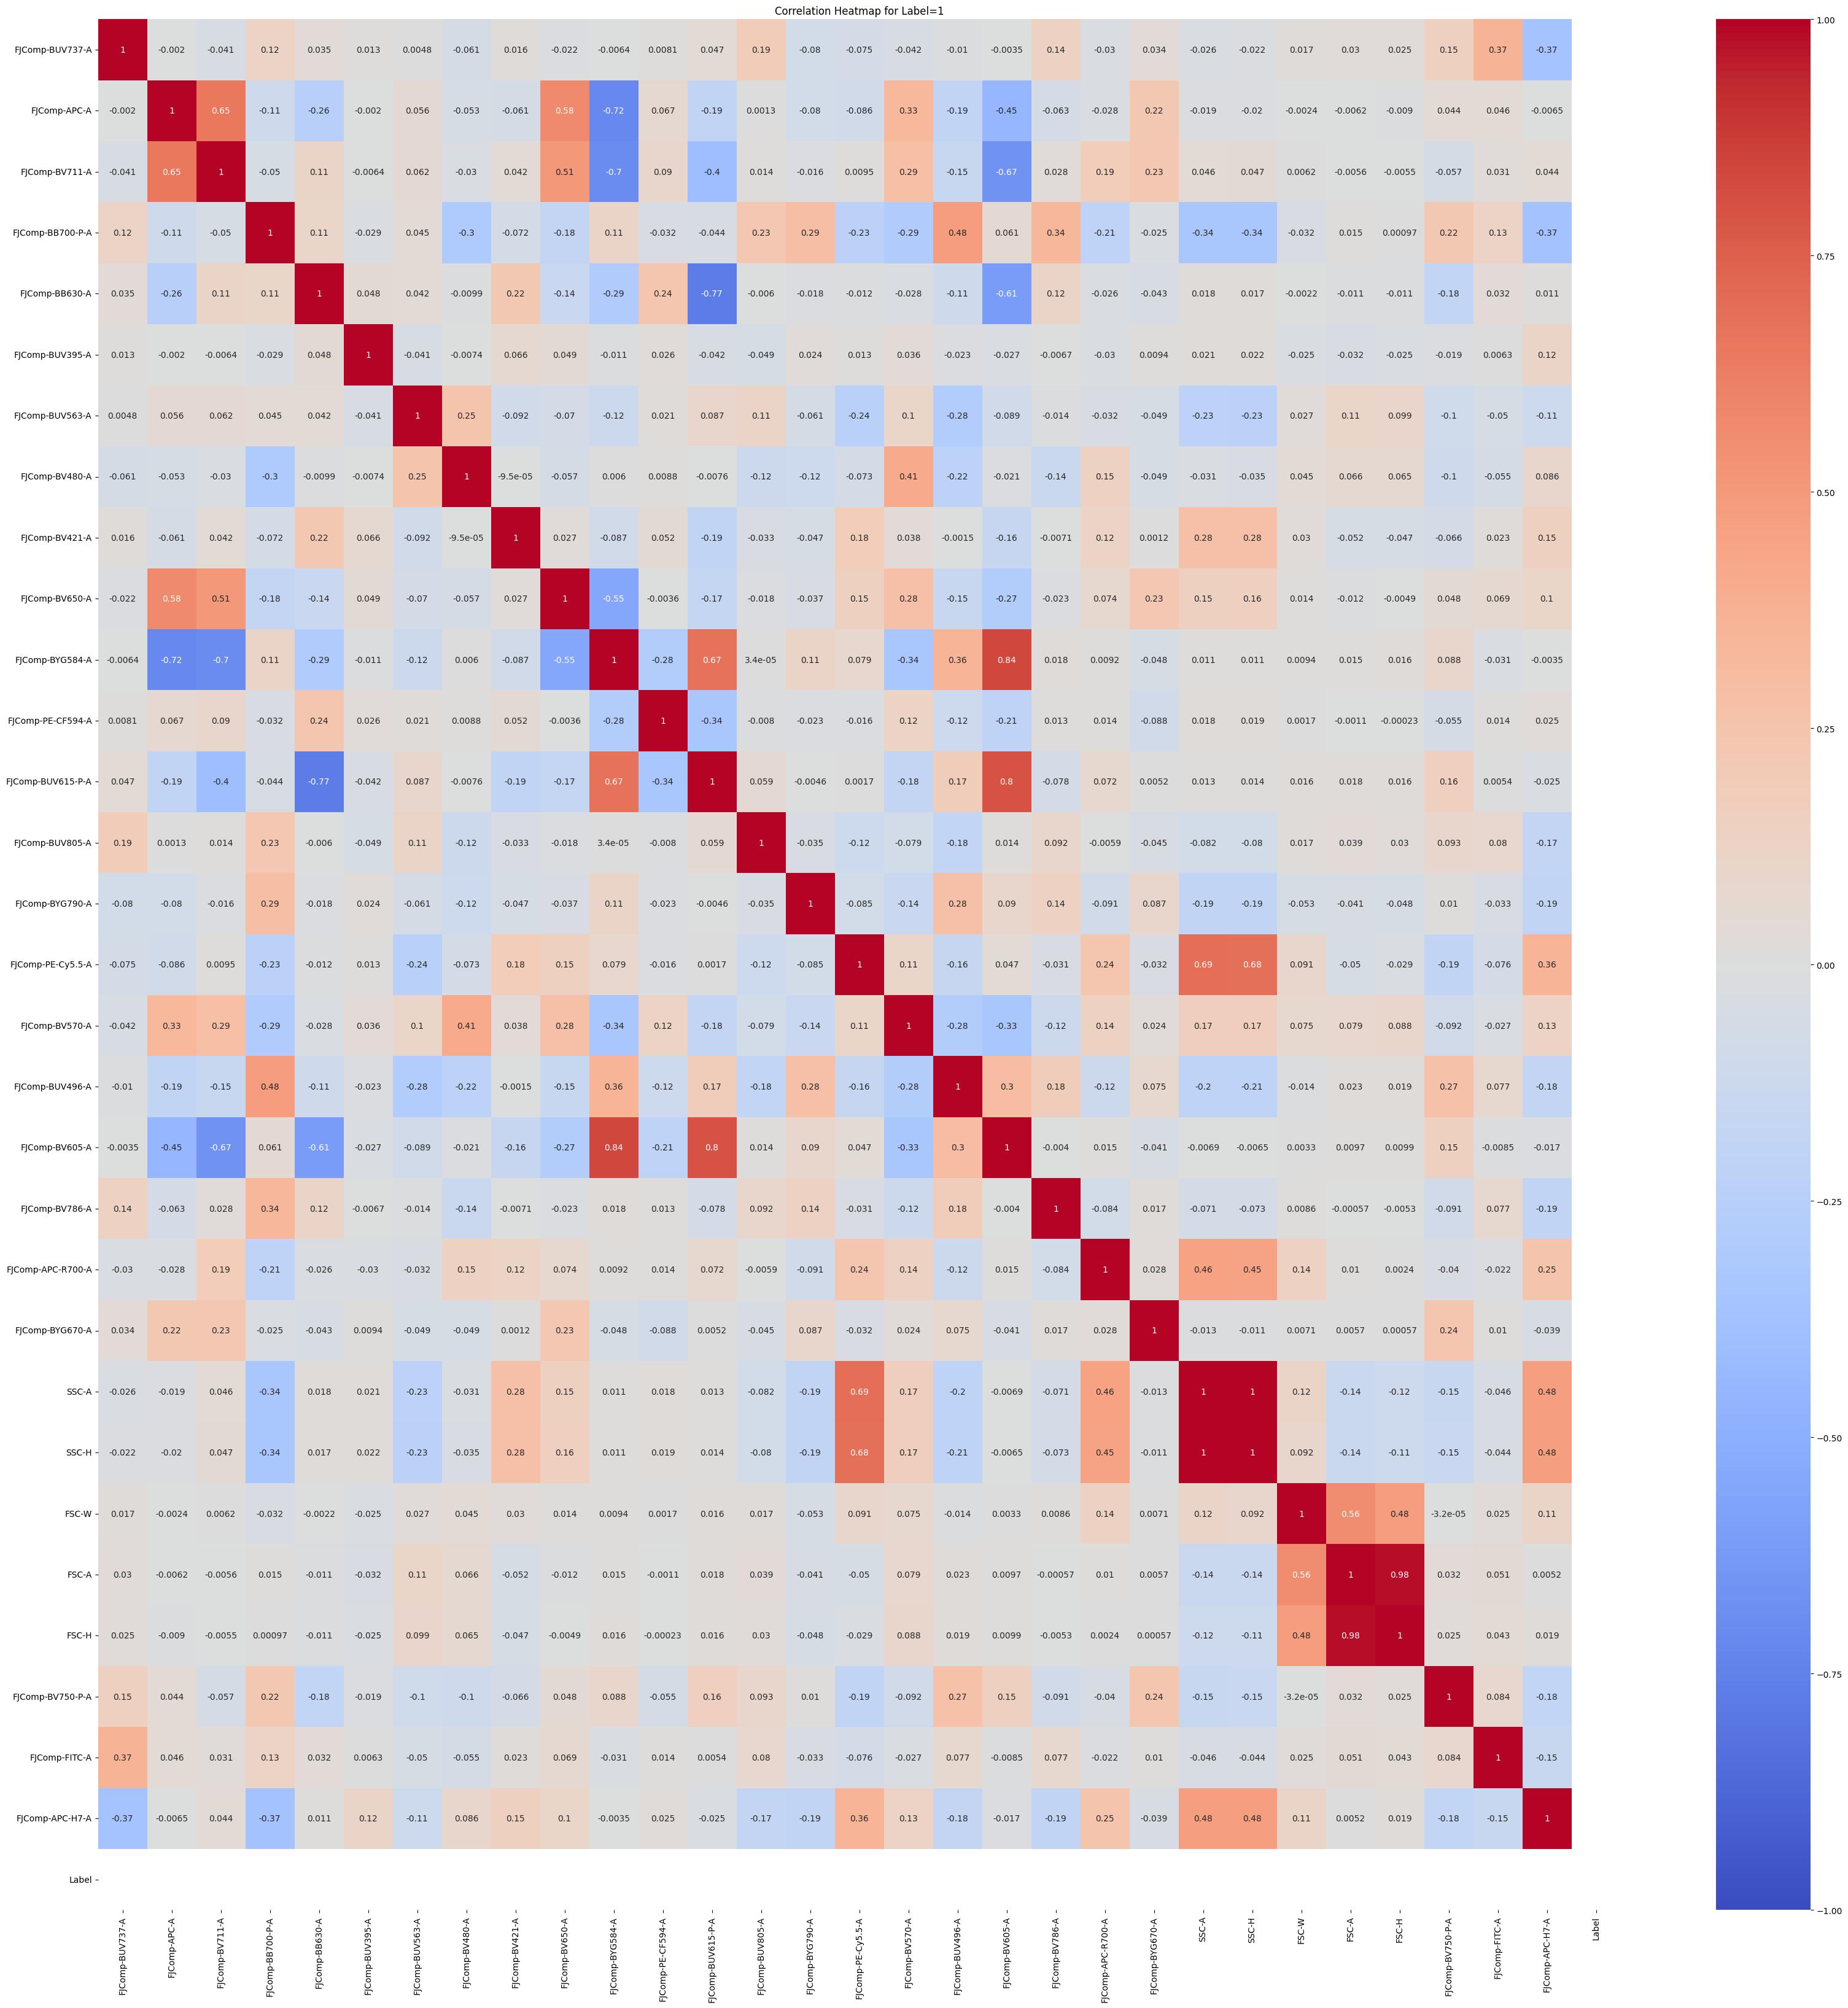

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据或者使用您的DataFrame
# final_df = pd.read_csv("your_data.csv")

# 选择要计算相关性的特征列
selected_features = ['FJComp-BUV737-A','FJComp-APC-A','FJComp-BV711-A','FJComp-BB700-P-A','FJComp-BB630-A','FJComp-BUV395-A','FJComp-BUV563-A','FJComp-BV480-A',
'FJComp-BV421-A','FJComp-BV650-A','FJComp-BYG584-A','FJComp-PE-CF594-A','FJComp-BUV615-P-A','FJComp-BUV805-A','FJComp-BYG790-A',
'FJComp-PE-Cy5.5-A','FJComp-BV570-A','FJComp-BUV496-A','FJComp-BV605-A','FJComp-BV786-A','FJComp-APC-R700-A','FJComp-BYG670-A',
'SSC-A','SSC-H','FSC-W','FSC-A','FSC-H','FJComp-BV750-P-A','FJComp-FITC-A','FJComp-APC-H7-A','Label']

# 选择 label 列中值为 1 的行数据
positive_samples = final_df[final_df['Label'] == 1]

# 计算相关性矩阵
correlation_matrix = positive_samples[selected_features].corr()

# 绘制热力图
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Label=1')
plt.show()


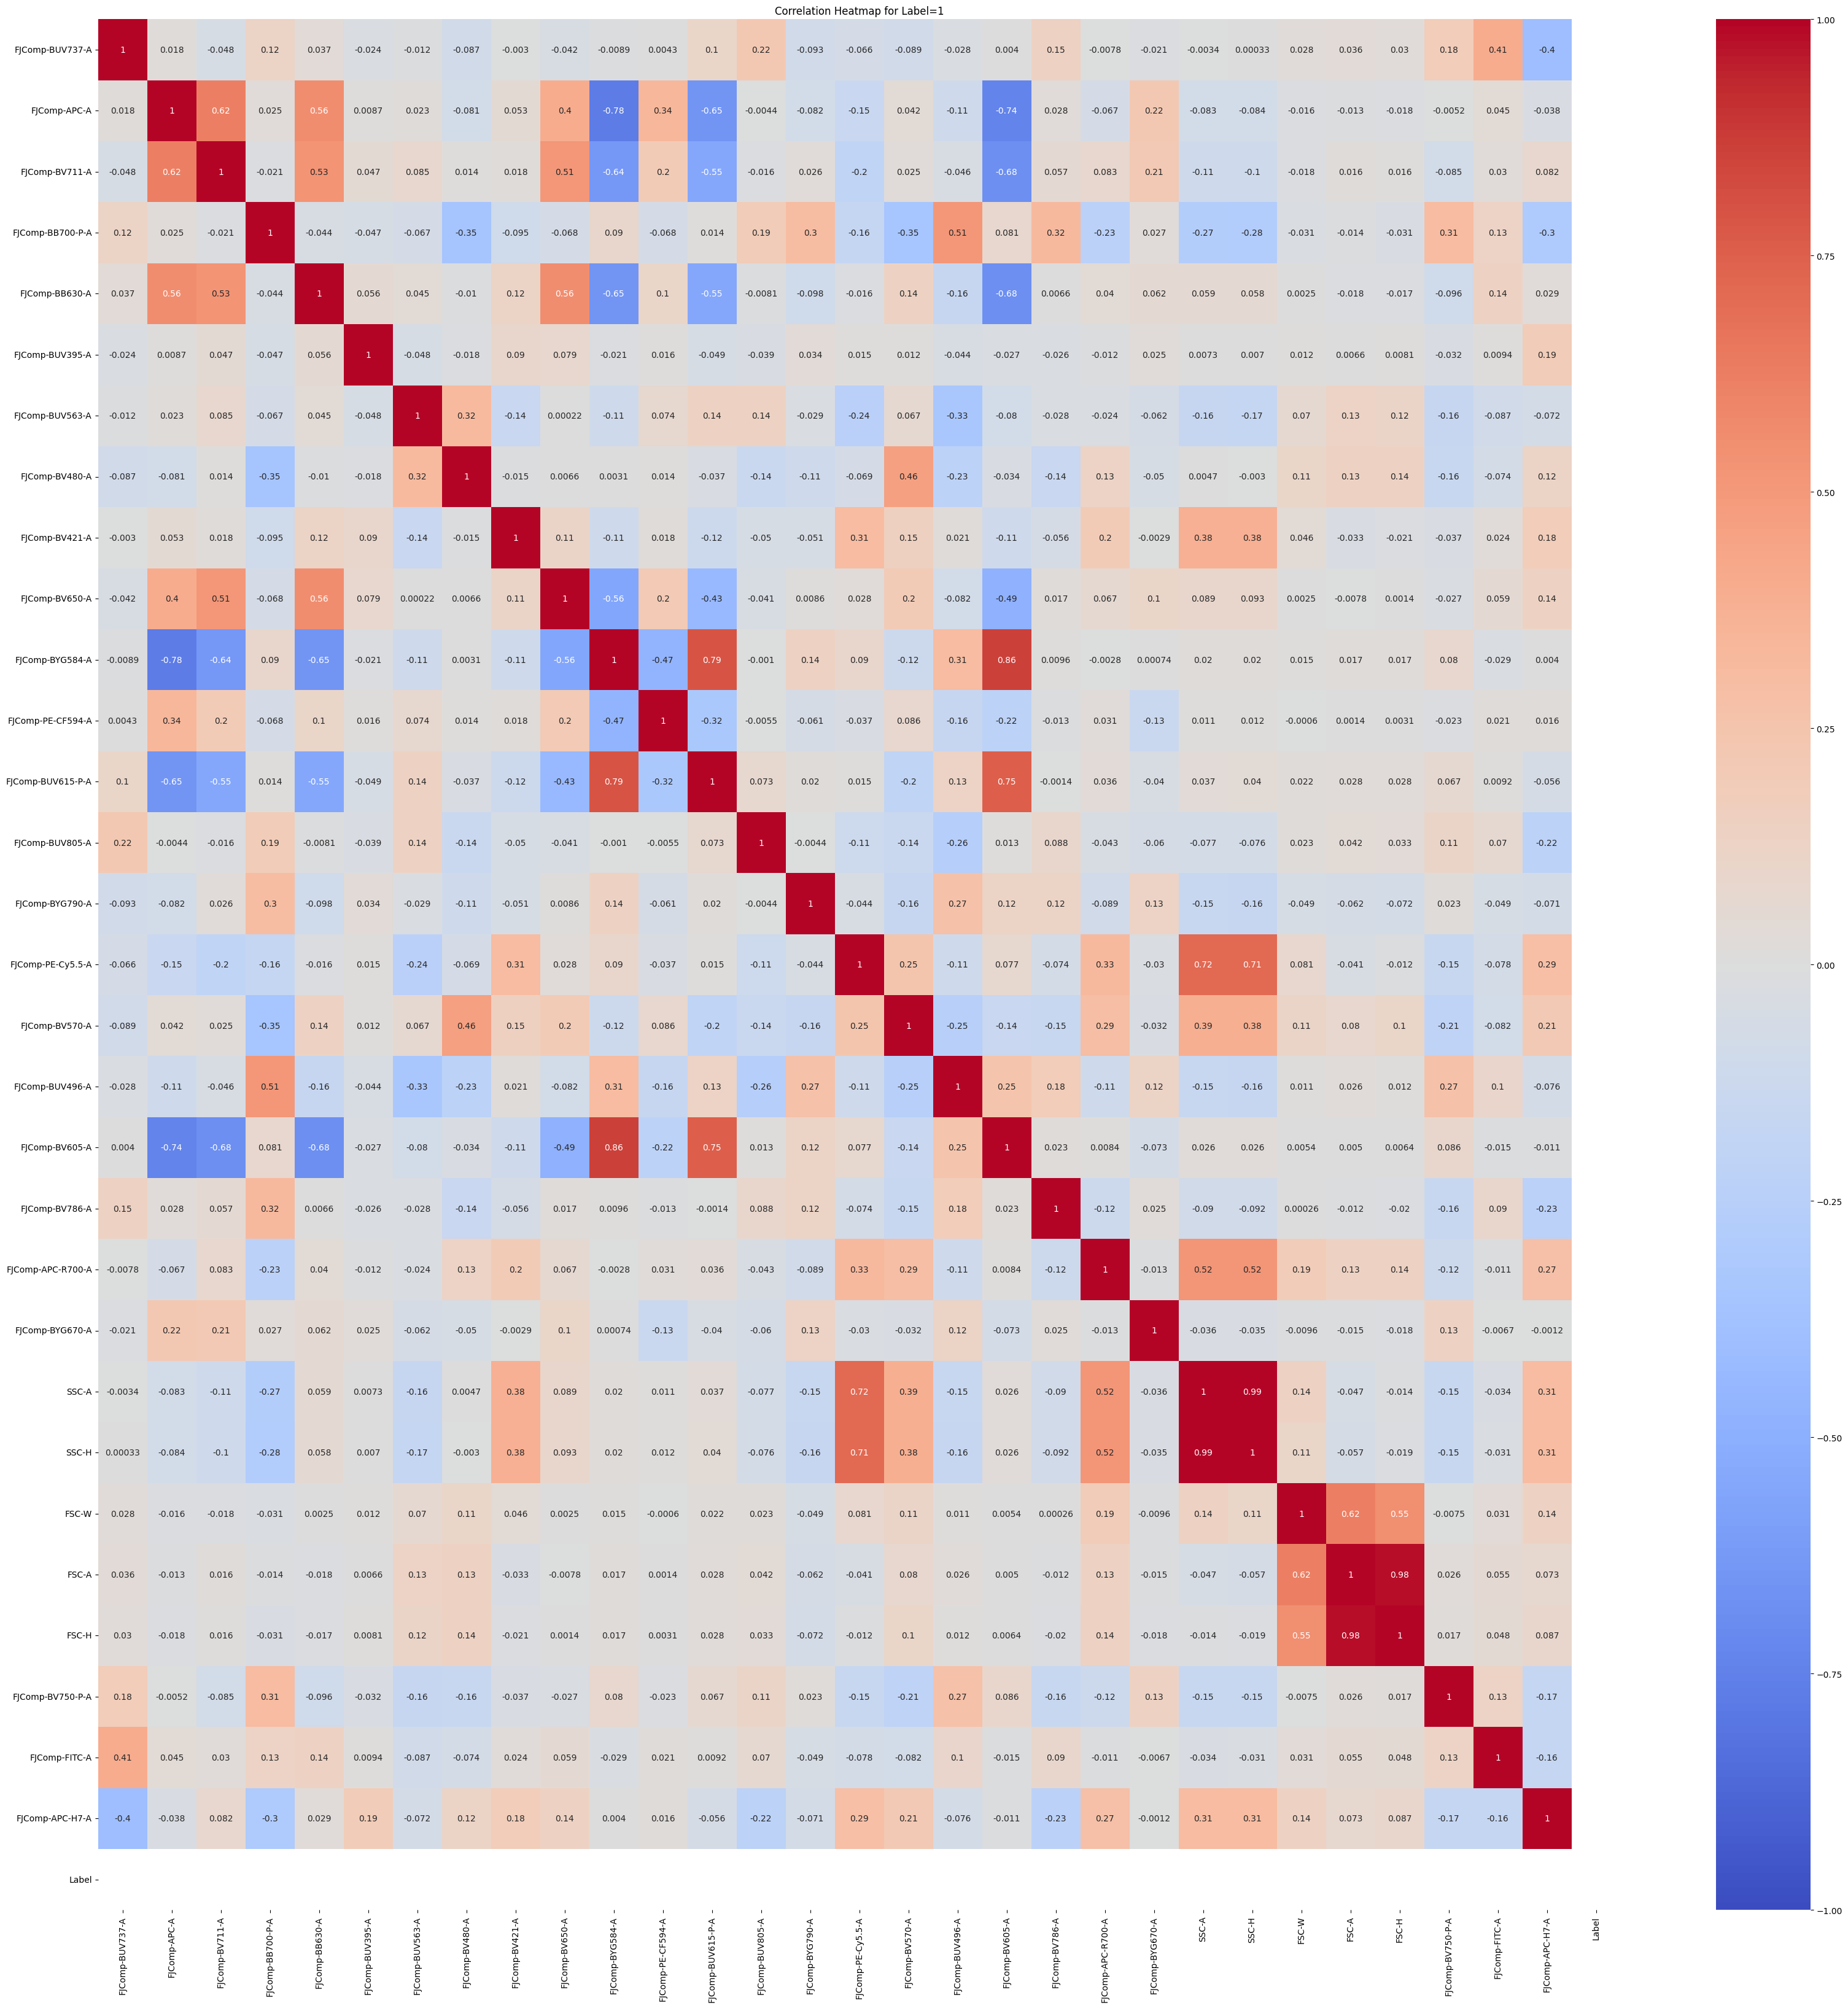

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据或者使用您的DataFrame
# final_df = pd.read_csv("your_data.csv")

# 选择要计算相关性的特征列
selected_features = ['FJComp-BUV737-A','FJComp-APC-A','FJComp-BV711-A','FJComp-BB700-P-A','FJComp-BB630-A','FJComp-BUV395-A','FJComp-BUV563-A','FJComp-BV480-A',
'FJComp-BV421-A','FJComp-BV650-A','FJComp-BYG584-A','FJComp-PE-CF594-A','FJComp-BUV615-P-A','FJComp-BUV805-A','FJComp-BYG790-A',
'FJComp-PE-Cy5.5-A','FJComp-BV570-A','FJComp-BUV496-A','FJComp-BV605-A','FJComp-BV786-A','FJComp-APC-R700-A','FJComp-BYG670-A',
'SSC-A','SSC-H','FSC-W','FSC-A','FSC-H','FJComp-BV750-P-A','FJComp-FITC-A','FJComp-APC-H7-A','Label']

# 选择 label 列中值为 1 的行数据
positive_samples = final_df[final_df['Label'] == 0]

# 计算相关性矩阵
correlation_matrix = positive_samples[selected_features].corr()

# 绘制热力图
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Label=1')
plt.show()
